# Regressions

$X = (0,1)$

$Y = sin(2\pi X)$

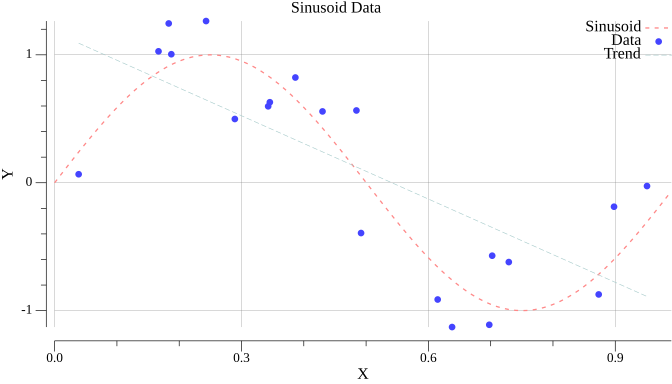

In [24]:
// deno-lint-ignore-file

import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";
import pl from "npm:nodejs-polars";
import plot from "../plot/mod.ts";

const data = await Deno.readTextFile("assets/X_Y_Sinusoid_Data.csv");
const df = pl.readCSV(data, { sep: "," });

const real = pl.DataFrame({ x: new Array(100).fill(0).map((_, i) => i / 100)}).select(
    pl.col('x'),
    pl.col('x').mul(2).mul(3.14).sin().alias('y')
);

const draw = (x, y, title = "Sinusoid Data") => 
  plot.DrawPlot(
      { 
          title,
          width: 7,
          height: 4,
          XLabel: "X", 
          YLabel: "Y", 
      }, 
      { type: "line", data: [real.x, real.y], legend: "Sinusoid", lineDashes: [3, 4], lineColor: "#ff8888", lineWidth: 1 },
      { type: "scatter", data: [x, y], legend: "Data", lineDashes: [3, 4], lineWidth: 2, glyphColor: "#4444ff", glyphShape: "circle" },
      { type: "trend", data: [x, y], legend: "Trend", lineDashes: [4, 2], lineColor: '#aacccc', lineWidth: .5 },
  );


draw(df.x, df.y);